# Práctica # 4

##### Statistical Learning II
##### Gustavo Alvarado
##### Carnet # 20063401 

In [1]:
import numpy as np
import pandas as pd
import io
import math
import matplotlib.pyplot as plt

## Cálculo de la salida de MLP

In [2]:
#Función de activación
def sigmoid(X):
  return 1 / (1 + np.exp(-X))

### Ejercicio 1

<img src="https://gadictos.com/wp-content/uploads/2019/05/bp1.png">

In [61]:
Wc1_E1 = np.array([
   [0.9, 0.3, 0.2],
   [0.8, 0.5, 0.4],
   [0.1, 0.6, 0.7]
])

Wc2_E1 = np.array([0.3, 0.5 ,0.9])

X_E1 = np.array([
      [1 ,0, 1],
      [1, 2, 3],
      [4, 5, 6],
      [6, 7, 8],
])

In [62]:
H_E1 = np.matmul(X_E1, Wc1_E1)
H_E1

array([[ 1. ,  0.9,  0.9],
       [ 2.8,  3.1,  3.1],
       [ 8.2,  7.3,  7. ],
       [11.8, 10.1,  9.6]])

In [63]:
A_E1 = sigmoid(H_E1)
A_E1 

array([[0.73105858, 0.7109495 , 0.7109495 ],
       [0.94267582, 0.95689275, 0.95689275],
       [0.99972542, 0.99932492, 0.99908895],
       [0.9999925 , 0.99995892, 0.99993228]])

In [64]:
Y_Prediction_E1 = sigmoid(np.matmul(A_E1, Wc2_E1))
Y_Prediction_E1

array([0.77112013, 0.83513309, 0.84537273, 0.8455238 ])

### Ejercicio 2

<img src="https://i.imgur.com/IDFRq5a.png">

In [65]:
Wc1_E2 = np.array([
   [0.8 ,0.2],
   [0.4, 0.9],
   [0.3, 0.5]
])

Wc2_E2 = np.array([0.3, 0.5, 0.9])

X_E2 = np.array([
      [1, 1],
      [1, 2],
      [4, 5],
      [6, 7]
])

In [66]:
H_E2 = np.matmul(X_E2, Wc1_E2.T)
H_E2

array([[1. , 1.3, 0.8],
       [1.2, 2.2, 1.3],
       [4.2, 6.1, 3.7],
       [6.2, 8.7, 5.3]])

In [67]:
A_E2 = sigmoid(H_E2)
A_E2 

array([[0.73105858, 0.78583498, 0.68997448],
       [0.76852478, 0.90024951, 0.78583498],
       [0.98522597, 0.99776215, 0.97587298],
       [0.99797468, 0.99983344, 0.9950332 ]])

In [68]:
Y_Prediction_E2 = sigmoid(np.matmul(A_E2, Wc2_E2))
Y_Prediction_E2

array([0.77438027, 0.80026216, 0.84194007, 0.84485948])

### Ejercicio 3

<img src="https://drive.google.com/uc?export=view&id=1ECUyQHIV0TQXIft793mCuqRx7sIMfKO-" width="600">


In [70]:
Wc1_E3 = np.array([
   [5, -2, -8],
   [7, -3, 1],
   [0, 0, 0]
])

Wc2_E3 = np.array([7, 5, -6])

X_E3 = np.array([
      [2, 2, 1],
      [3, 2, 1],
      [7, 5, 1],
      [4, 6, 1]
])

In [71]:
H_E3 = np.matmul(X_E3, Wc1_E3.T)
H_E3

array([[-2,  9,  0],
       [ 3, 16,  0],
       [17, 35,  0],
       [ 0, 11,  0]])

In [72]:
A_E3 = sigmoid(H_E3)
A_E3 

array([[0.11920292, 0.99987661, 0.5       ],
       [0.95257413, 0.99999989, 0.5       ],
       [0.99999996, 1.        , 0.5       ],
       [0.5       , 0.9999833 , 0.5       ]])

In [73]:
Y_Prediction_E3 = sigmoid(np.matmul(A_E3, Wc2_E3))
Y_Prediction_E3

array([0.9444754 , 0.99982803, 0.99987661, 0.99592952])

## Función XOR

In [17]:
#Definiendo X y Y para la función XOR

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

In [18]:
#Derivada de la función de activación
def derivateSigmoid(X):
  return X * (1 - X)

In [28]:
#Función de entrenamiento

def MLPTraining(X, Y, lr, EPOCHS):

  h_Weight = np.random.uniform(size = (2, 2))
  Y_Weight = np.random.uniform(size = (2, 1))

  h_Bias = np.random.uniform(size = (1, 2))
  Y_Bias = np.random.uniform(size = (1, 1))

  loss = 0

  for epoch in range(EPOCHS): 

    #wX + b
    h = np.dot(X, h_Weight) + h_Bias
    h_Output = sigmoid(h)
    
    Y_Output = np.dot(h_Output, Y_Weight) + Y_Bias
    Y_Estimated = sigmoid(Y_Output)

    #Calcuando MSE del error cuadrado
    loss = 0.5 * (Y - Y_Estimated) ** 2
    error = Y - Y_Estimated

    #Calculando gradientes
    h_Gradient = np.matmul(X.T, ((error * derivateSigmoid(Y_Estimated)) * Y_Weight.T) * derivateSigmoid(h_Output))
    Y_Gradient = np.matmul(h_Output.T, error * derivateSigmoid(Y_Estimated))

    #Actualizando weights
    h_Weight += lr * h_Gradient
    Y_Weight += lr * Y_Gradient 

    #Actualizando biases
    h_Bias += np.sum(lr * ((error * derivateSigmoid(Y_Estimated)) * Y_Weight.T) * derivateSigmoid(h_Output), axis = 0)
    Y_Bias += np.sum(lr * error * derivateSigmoid(Y_Estimated), axis = 0)

    if epoch % 5000 == 0:
      print('Epoch', epoch, 'Loss:', np.sum(loss))

  return h_Output, h_Weight, h_Bias, Y_Weight, Y_Bias 


In [30]:
h_Output, h_Weight, h_Bias, Y_Weight, Y_Bias = MLPTraining(X, Y, 0.7, 100000)

Epoch 0 Loss: 0.6286186058871519
Epoch 5000 Loss: 0.0009085322917646869
Epoch 10000 Loss: 0.0004037222089469946
Epoch 15000 Loss: 0.000257537903730844
Epoch 20000 Loss: 0.00018852161799988283
Epoch 25000 Loss: 0.00014845476541513
Epoch 30000 Loss: 0.00012232396561972857
Epoch 35000 Loss: 0.0001039542110543718
Epoch 40000 Loss: 9.034421857868705e-05
Epoch 45000 Loss: 7.986129933706403e-05
Epoch 50000 Loss: 7.154176903844938e-05
Epoch 55000 Loss: 6.47804386187091e-05
Epoch 60000 Loss: 5.917825154560577e-05
Epoch 65000 Loss: 5.446149065499798e-05
Epoch 70000 Loss: 5.04361983150564e-05
Epoch 75000 Loss: 4.696112528020821e-05
Epoch 80000 Loss: 4.3930982493666964e-05
Epoch 85000 Loss: 4.126569319371978e-05
Epoch 90000 Loss: 3.8903279859495424e-05
Epoch 95000 Loss: 3.679502906531156e-05


In [31]:
h_Weight

array([[5.40262826, 7.27437575],
       [5.41014438, 7.30509726]])

In [32]:
h_Bias

array([[-8.28008572, -3.33579772]])

In [33]:
Y_Weight

array([[-12.90695586],
       [ 12.21743194]])

In [34]:
Y_Bias

array([[-5.76979169]])

In [35]:
#Función para clasificación

def classify(point, h_Weight, h_Bias, Y_Weight, Y_Bias): 

  h = np.dot(point, h_Weight) + h_Bias
  h_Output = sigmoid(h)
    
  Y_Output = np.dot(h_Output, Y_Weight) + Y_Bias
  Y_Estimated = sigmoid(Y_Output)

  if (Y_Estimated) >= 0.5:
    return 1
  else:
    return 0

In [36]:
classify([0, 0], h_Weight, h_Bias, Y_Weight, Y_Bias)

0

In [37]:
classify([0, 1], h_Weight, h_Bias, Y_Weight, Y_Bias)

1

In [38]:
classify([1, 0], h_Weight, h_Bias, Y_Weight, Y_Bias)

1

In [39]:
classify([1, 1], h_Weight, h_Bias, Y_Weight, Y_Bias)

0

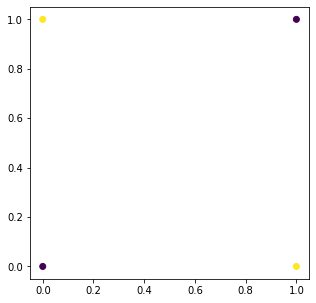

In [40]:
#Graficando datos de entrenamiento

plt.figure(figsize = (5, 5))
plt.scatter(X[:,0], X[:,1,], c = Y)

plt.show()

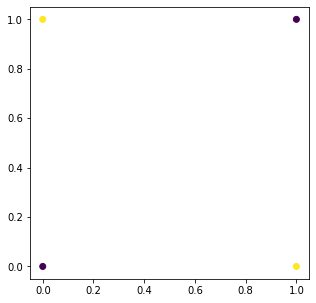

In [41]:
#Graficando el modelo entrenado

Y_Prediction = np.array(
    [
        [classify([0, 0], h_Weight, h_Bias, Y_Weight, Y_Bias)],
        [classify([0, 1], h_Weight, h_Bias, Y_Weight, Y_Bias)],
        [classify([1, 0], h_Weight, h_Bias, Y_Weight, Y_Bias)],
        [classify([1, 1], h_Weight, h_Bias, Y_Weight, Y_Bias)]
    ])

plt.figure(figsize = (5, 5))
plt.scatter(X[:,0], X[:,1,], c = Y_Prediction)

plt.show()